# USA Housing Dataset Analysis
### Project Structure and Overview
### This Jupyter Notebook covers the end-to-end analysis of the USA Housing Dataset. The key components of the project are:

1. **Data Loading and Exploration:** The notebook begins by loading the dataset, examining the first few rows, and obtaining high-level statistics about the data.

2. **Data Cleaning and Preprocessing:** Unnecessary columns are dropped, and data types are converted to appropriate formats.

3. **Exploratory Data Analysis (EDA):** A comprehensive EDA is performed, including visualizations of price distributions, correlations, and relationships between features.

4. **Custom Linear Regression Implementation:** A custom Linear Regression class is implemented from scratch, including functions for model fitting, prediction, and evaluation using various metrics.

5. **Model Training and Evaluation:** The dataset is split into training and test sets, the features are scaled, and the linear regression model is trained and evaluated on both the training and test data. Cross-validation is also performed.

6. **Feature Importance Analysis:** The importance of different features in the model is analyzed and visualized.

7. **Residual Analysis:** Residual plots and distributions are examined to check the model's assumptions.

8. **Actual vs. Predicted Prices:** A scatter plot is created to visualize the relationship between actual and predicted house prices.

9. **Price Prediction for Example House:** A function is provided to predict the price of a new house given its features.

## Imports and Libraries
The notebook begins by importing the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Data Loading and Exploration
The dataset is loaded from a CSV file, and the first few rows are displayed to get a sense of the data.

In [2]:
df = pd.read_csv('E:\CS 009\\USA Housing Dataset.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,0.007488,0.246618,3.452415,1831.351449,312.287440,1970.814010,808.368357
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.086219,0.790619,0.678533,861.382947,464.349222,29.807941,979.380535
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,0.000000,0.000000,3.000000,1600.000000,0.000000,1976.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2310.000000,602.500000,1997.000000,1999.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,8020.000000,4820.000000,2014.000000,2014.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   object 
dtypes: float

### Data Cleaning and Preprocessing
Unnecessary columns are dropped from the dataset, and the data types of certain columns are converted to integers.

In [6]:
df = df.drop(['date','street','city','statezip','country'],axis=1)

In [7]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0


In [8]:
df.shape

(4140, 13)

In [9]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

price            1625
bedrooms            9
bathrooms          24
sqft_living       549
sqft_lot         2856
floors              6
waterfront          2
view                5
condition           5
sqft_above        491
sqft_basement     205
yr_built          115
yr_renovated       60
dtype: int64

In [12]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
dtype: object

In [13]:
print(df.columns)

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')


In [14]:
df[['price','bedrooms','bathrooms','floors']] = df[['price','bedrooms','bathrooms','floors']].astype('int64')

In [15]:
df.dtypes

price            int64
bedrooms         int64
bathrooms        int64
sqft_living      int64
sqft_lot         int64
floors           int64
waterfront       int64
view             int64
condition        int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
dtype: object

In [16]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,376000,3,2,1340,1384,3,0,0,3,1340,0,2008,0
1,800000,4,3,3540,159430,2,0,0,3,3540,0,2007,0
2,2238888,5,6,7270,130017,2,0,0,3,6420,850,2010,0
3,324000,3,2,998,904,2,0,0,3,798,200,2007,0
4,549900,5,2,3060,7015,1,0,0,5,1600,1460,1979,0


### Exploratory Data Analysis (EDA)
The EDA section includes various visualizations to understand the distribution of house prices, the relationships between features, and the impact of different variables on the price:

- **Price distribution histogram**
- **Box plot of house prices**
- **Correlation heatmap**
- **Pairplot of key features**
- **Bar plots for price by number of bedrooms and waterfront property**
- **Box plot of price by condition and view**
- **Scatter plot of year built vs. price**
- **3D scatter plot of price, square footage, and bathrooms**
- **Scatter plot of lot area vs. living area (colored by price)**
- **Distribution plots for numerical features**

In [17]:

sns.set_palette('husl')

### Price Distribution Histogram
This visualization shows the distribution of house prices in the dataset using a histogram. The x-axis represents the price, while the y-axis shows the count or frequency of houses at each price point. The histogram is overlaid with a kernel density estimation (KDE) curve to provide a smooth representation of the underlying probability density function.
The key insights from this plot are:

- The price distribution is right-skewed, indicating that there are more houses at the lower end of the price range.
- The distribution has a long tail, suggesting that there are some very high-priced outlier properties.
- The peak of the distribution is around $450,000, indicating that this is the most common price range for houses in the dataset.

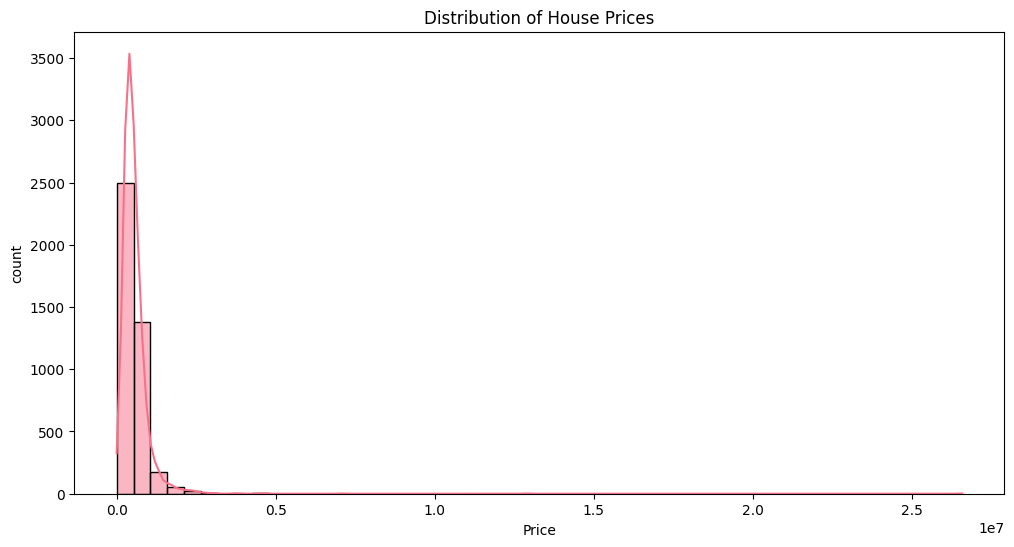

In [18]:
plt.figure(figsize=(12,6))
sns.histplot(df, x='price',bins=50,kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('count')
plt.show()

### Box Plot of House Prices
This box plot visualizes the distribution of house prices in the dataset. The box plot provides information about the median, interquartile range (IQR), and potential outliers.
The key insights from this plot are:

- The median house price is around $540,000.
- The IQR (middle 50% of the data) ranges from around $350,000 to $750,000, indicating a wide spread in house prices.
- There are several outliers at the high end of the price range, as indicated by the points beyond the whiskers of the box plot.

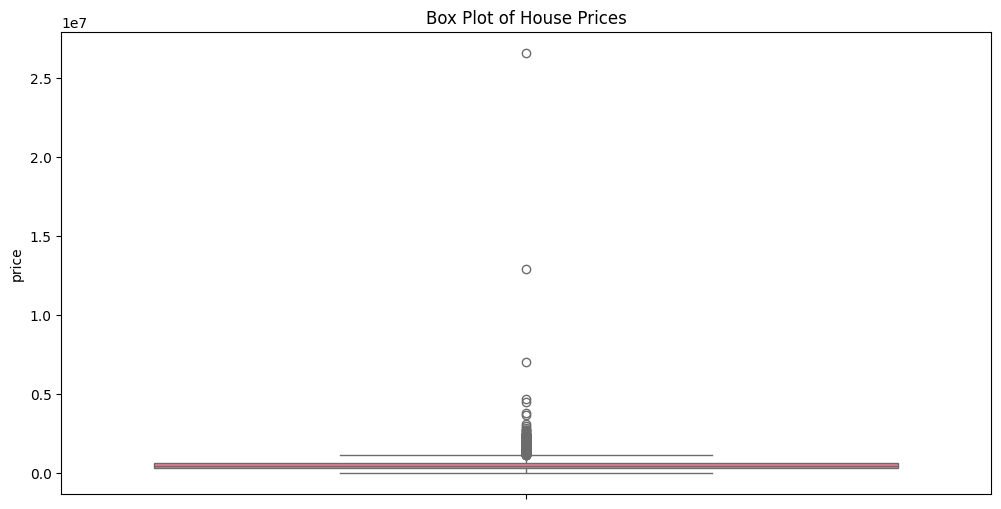

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(df,y='price')
plt.title('Box Plot of House Prices')
plt.show()

### Correlation Heatmap
The correlation heatmap shows the pairwise correlation coefficients between all the features in the dataset, including the target variable (price). The correlation values are represented using a color scale, where darker shades of blue indicate stronger positive correlations, and darker shades of red indicate stronger negative correlations.
The key insights from this plot are:

- The price is most strongly correlated with the sqft_living feature, indicating that the living square footage is an important predictor of house price.
- There is also a moderate positive correlation between price and the number of bedrooms and bathrooms.
- Some features, such as sqft_lot and floors, have a relatively weak correlation with price.

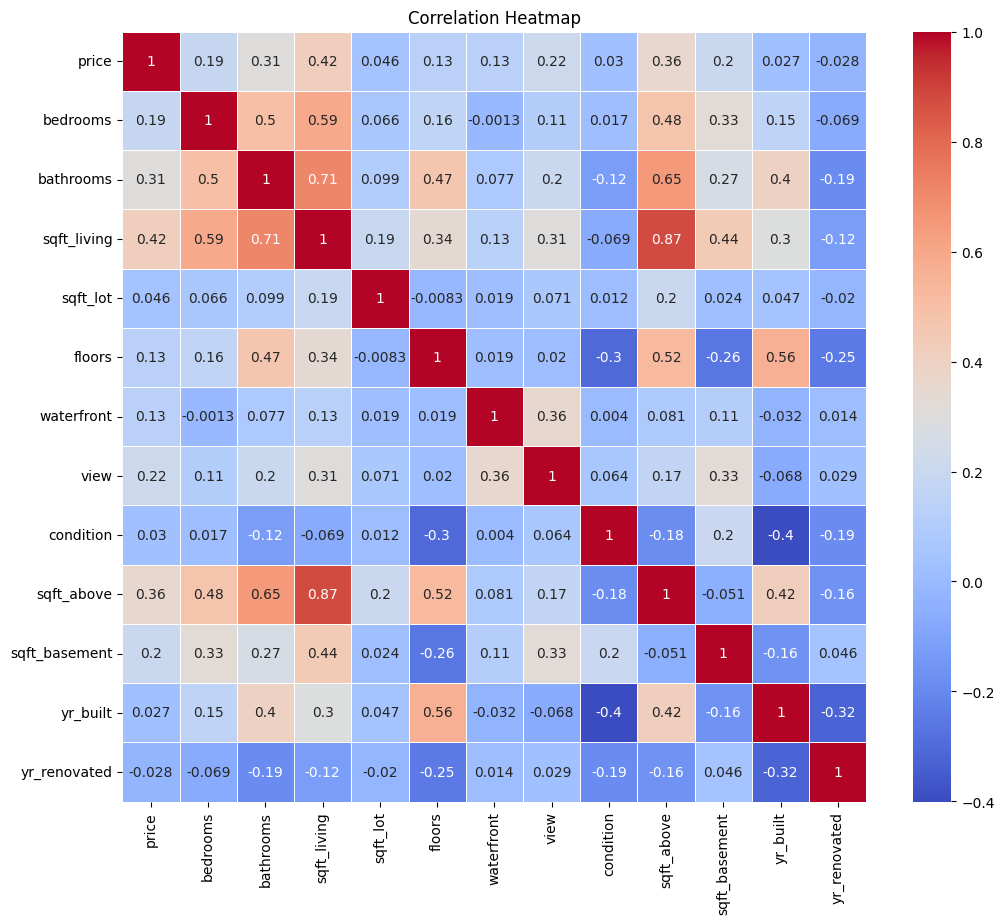

In [20]:
plt.figure(figsize=(12,10))
correlation=df.corr()
sns.heatmap(correlation, annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Pairplot of Key Features
The pairplot visualizes the bivariate relationships between the key features in the dataset, including the target variable (price). Each subplot shows the scatter plot between a pair of features, along with the corresponding univariate histograms on the diagonal.
The key insights from this plot are:

- There is a clear positive relationship between price and the numerical features, such as sqft_living, bedrooms, bathrooms, and floors.
- The distributions of these numerical features also appear to be right-skewed, similar to the overall price distribution.
- The pairplot provides a comprehensive overview of the relationships between the features, which can help identify potential multicollinearity or other interesting  patterns in the data.

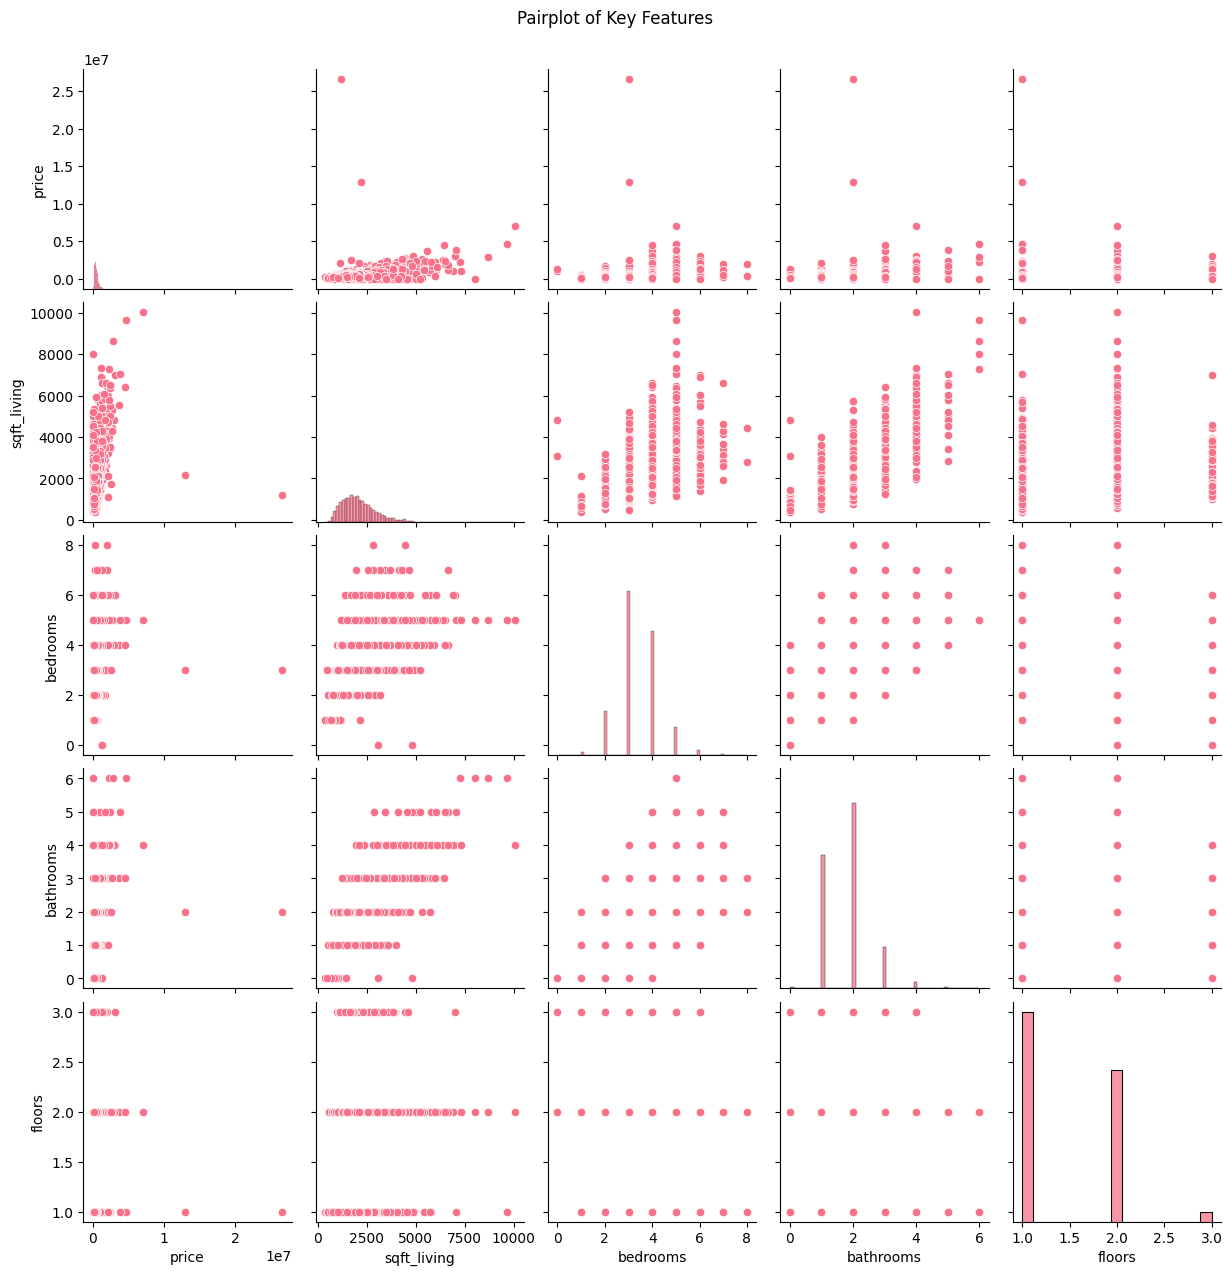

In [21]:
sns.pairplot(df[['price','sqft_living','bedrooms','bathrooms','floors']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

### Price by Number of Bedrooms
This bar plot shows the average house price for each number of bedrooms in the dataset. The x-axis represents the number of bedrooms, and the y-axis shows the average price.
The key insights from this plot are:

- As the number of bedrooms increases, the average house price also tends to increase.
- The average price for 1-bedroom houses is significantly lower than the prices for houses with more bedrooms.
- The price increase seems to slow down as the number of bedrooms goes beyond 4 or 5.

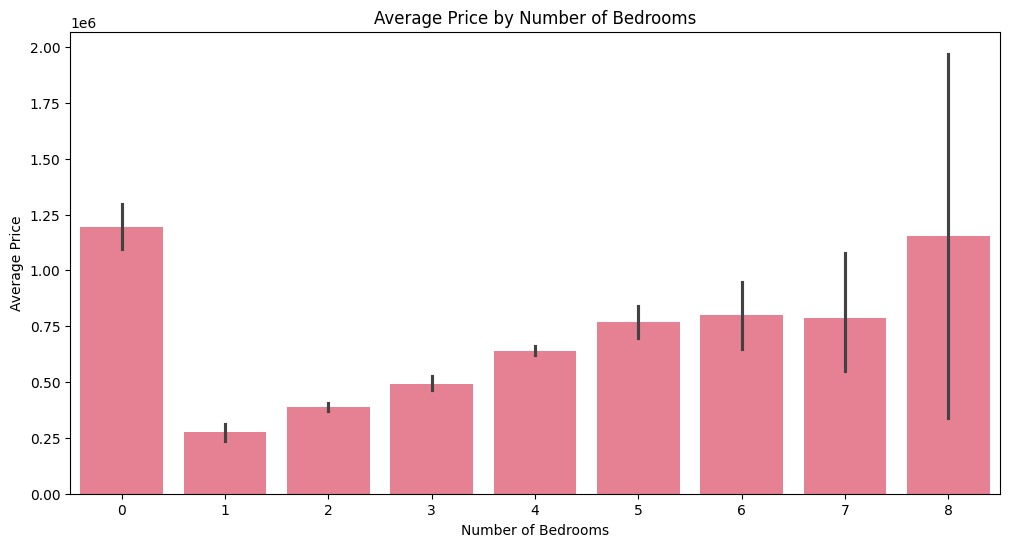

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(df,x='bedrooms',y='price')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

### Price by Waterfront Property
This bar plot shows the average house price for properties with and without a waterfront.
The key insight from this plot is:

- Houses with a waterfront (represented by a value of 1 in the waterfront feature) have a significantly higher average price compared to houses without a waterfront (represented by a value of 0).

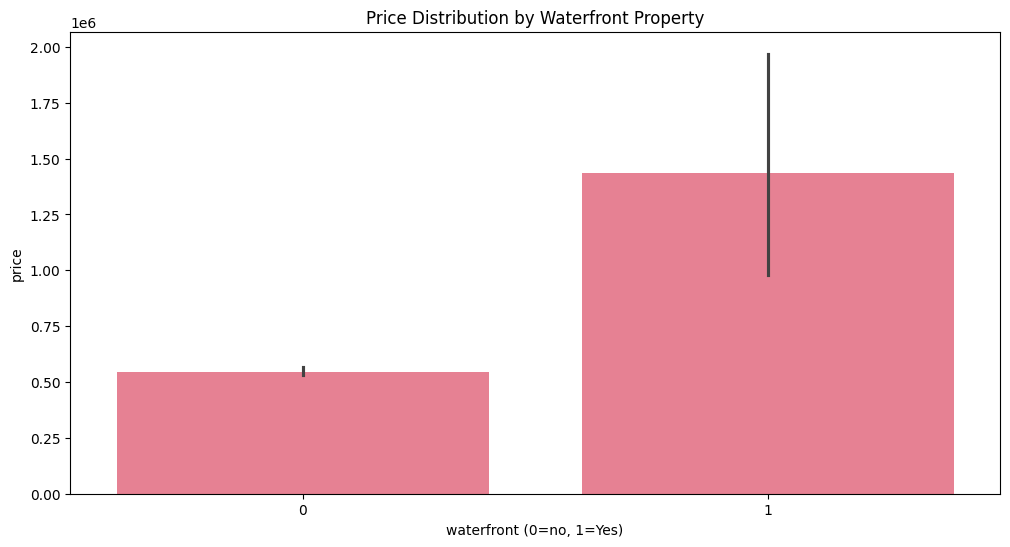

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(df,x='waterfront',y='price')
plt.title('Price Distribution by Waterfront Property')
plt.xlabel('waterfront (0=no, 1=Yes)')
plt.ylabel('price')
plt.show()

### Price Variation by Condition and View
This box plot shows the distribution of house prices by the condition and view features. The x-axis represents the condition of the house, and the y-axis shows the price. The different colors represent the number of views the house has.
The key insights from this plot are:

- As the condition of the house improves, the median house price generally increases.
- Houses with a higher number of views (represented by larger values in the view feature) tend to have higher prices, especially for houses in better condition.
- There is a wider spread in prices for houses with higher view counts, indicating more variability in the pricing of these properties.

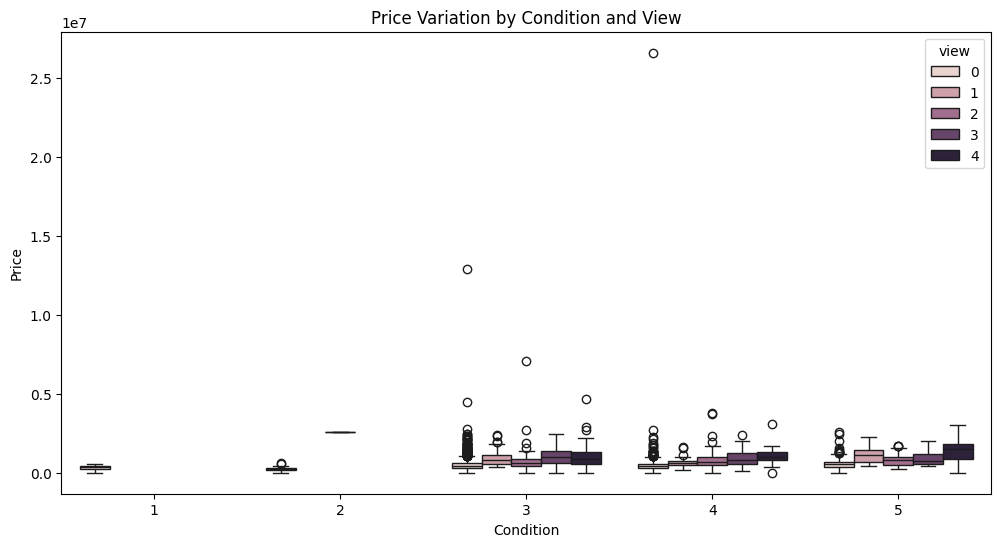

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='condition', y='price', hue='view')
plt.title('Price Variation by Condition and View')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

### Year Built vs. Price
This scatter plot shows the relationship between the year a house was built and its price.
The key insights from this plot are:

- There is a general trend of increasing house prices for more recently built homes.
- However, there is also a wide range of prices for houses built in the same year, indicating that other factors beyond just the year built are important in determining the - price.
- The scatter plot suggests that the relationship between year built and price is not linear, and there may be other non-linear patterns or interactions to explore.

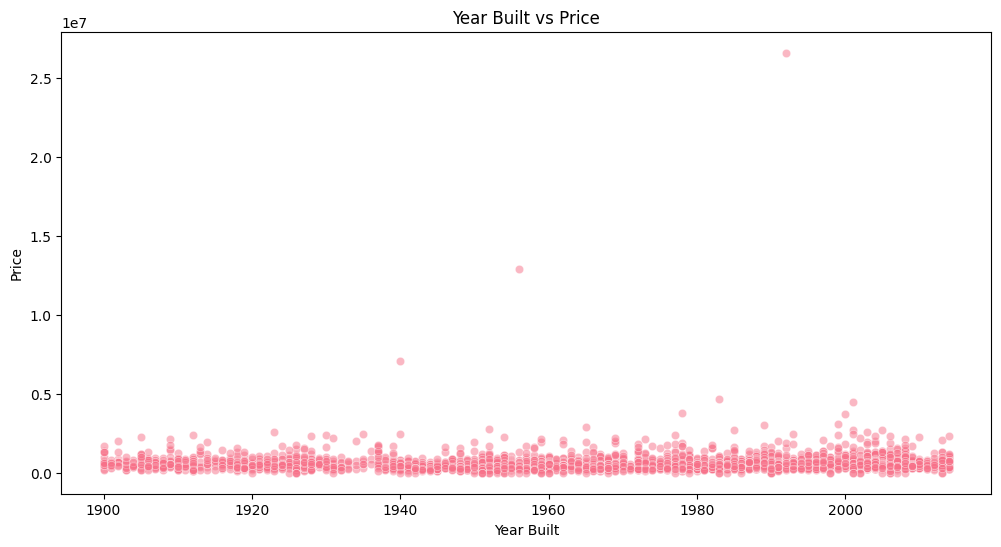

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='yr_built', y='price', alpha=0.5)
plt.title('Year Built vs Price')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

### 3D Relationship between Price, Square Footage, and Bathrooms
This 3D scatter plot visualizes the relationship between house price, square footage of the living area, and the number of bathrooms.
The key insights from this plot are:

- The 3D scatter plot allows us to see the interactions between these three important features in a more comprehensive way.
- The color of the points represents the number of bedrooms, providing an additional dimension to the visualization.
- The size of the points is scaled by the square footage of the living area, further emphasizing the relationships between the variables.
- This plot can help identify potential clusters or outliers in the data that may not be as easily visible in 2D visualizations.

In [26]:
fig = px.scatter_3d(df, x='sqft_living', y='bathrooms', z='price',
                    color='bedrooms', size='sqft_living',
                    title='3D Relationship between Price, Square Footage, and Bathrooms')
fig.show()

### Living Area vs. Lot Area (colored by price)
This scatter plot shows the relationship between the square footage of the living area and the square footage of the lot, with the points colored by the house price.
The key insights from this plot are:

- There is a positive relationship between the living area and lot size, but the relationship is not linear.
- The color coding by price reveals that higher-priced houses tend to have larger living areas and lot sizes, as indicated by the darker blue points.
- The plot also shows that there are some smaller-sized houses with high prices, as well as some larger-sized houses with lower prices, suggesting that other factors beyond just the living area and lot size are important in determining the price.

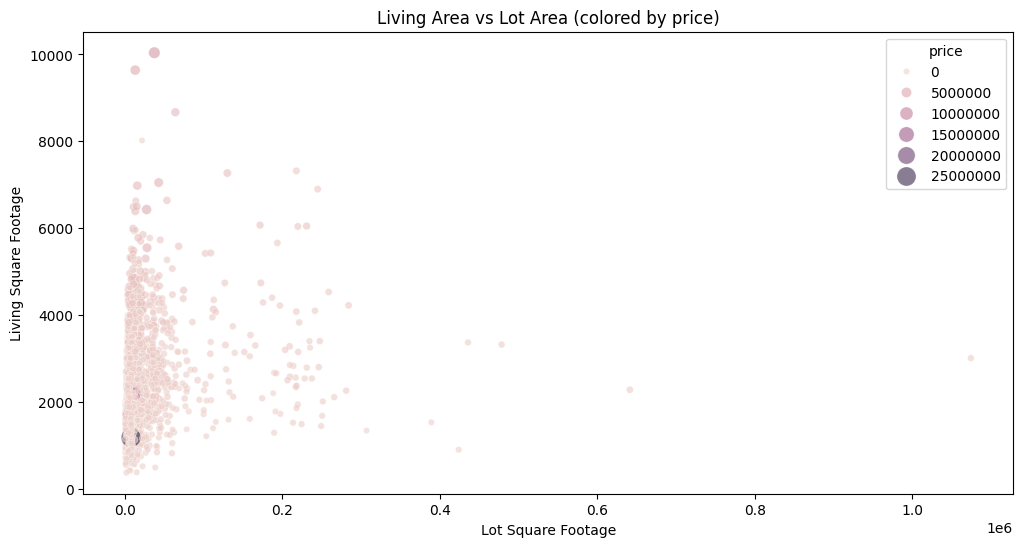

In [27]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='sqft_lot', y='sqft_living', hue='price', 
                size='price', sizes=(20, 200), alpha=0.6)
plt.title('Living Area vs Lot Area (colored by price)')
plt.xlabel('Lot Square Footage')
plt.ylabel('Living Square Footage')
plt.show()

### Numerical Feature Distributions
This set of subplots shows the distribution of each numerical feature in the dataset, excluding the target variable (price). The plots use histograms with kernel density estimation (KDE) to visualize the shape and spread of the distributions.
The key insights from these plots are:

- The distributions of the numerical features, such as bedrooms, bathrooms, floors, sqft_living, sqft_lot, and sqft_above, provide a detailed understanding of the - characteristics of the houses in the dataset.
- Some features, like bedrooms and bathrooms, appear to have more discrete, bimodal distributions, while others, like sqft_living and sqft_lot, have more continuous, - right-skewed distributions.
- Identifying the distributional properties of the features can inform the choice of appropriate modeling techniques and help in feature engineering.

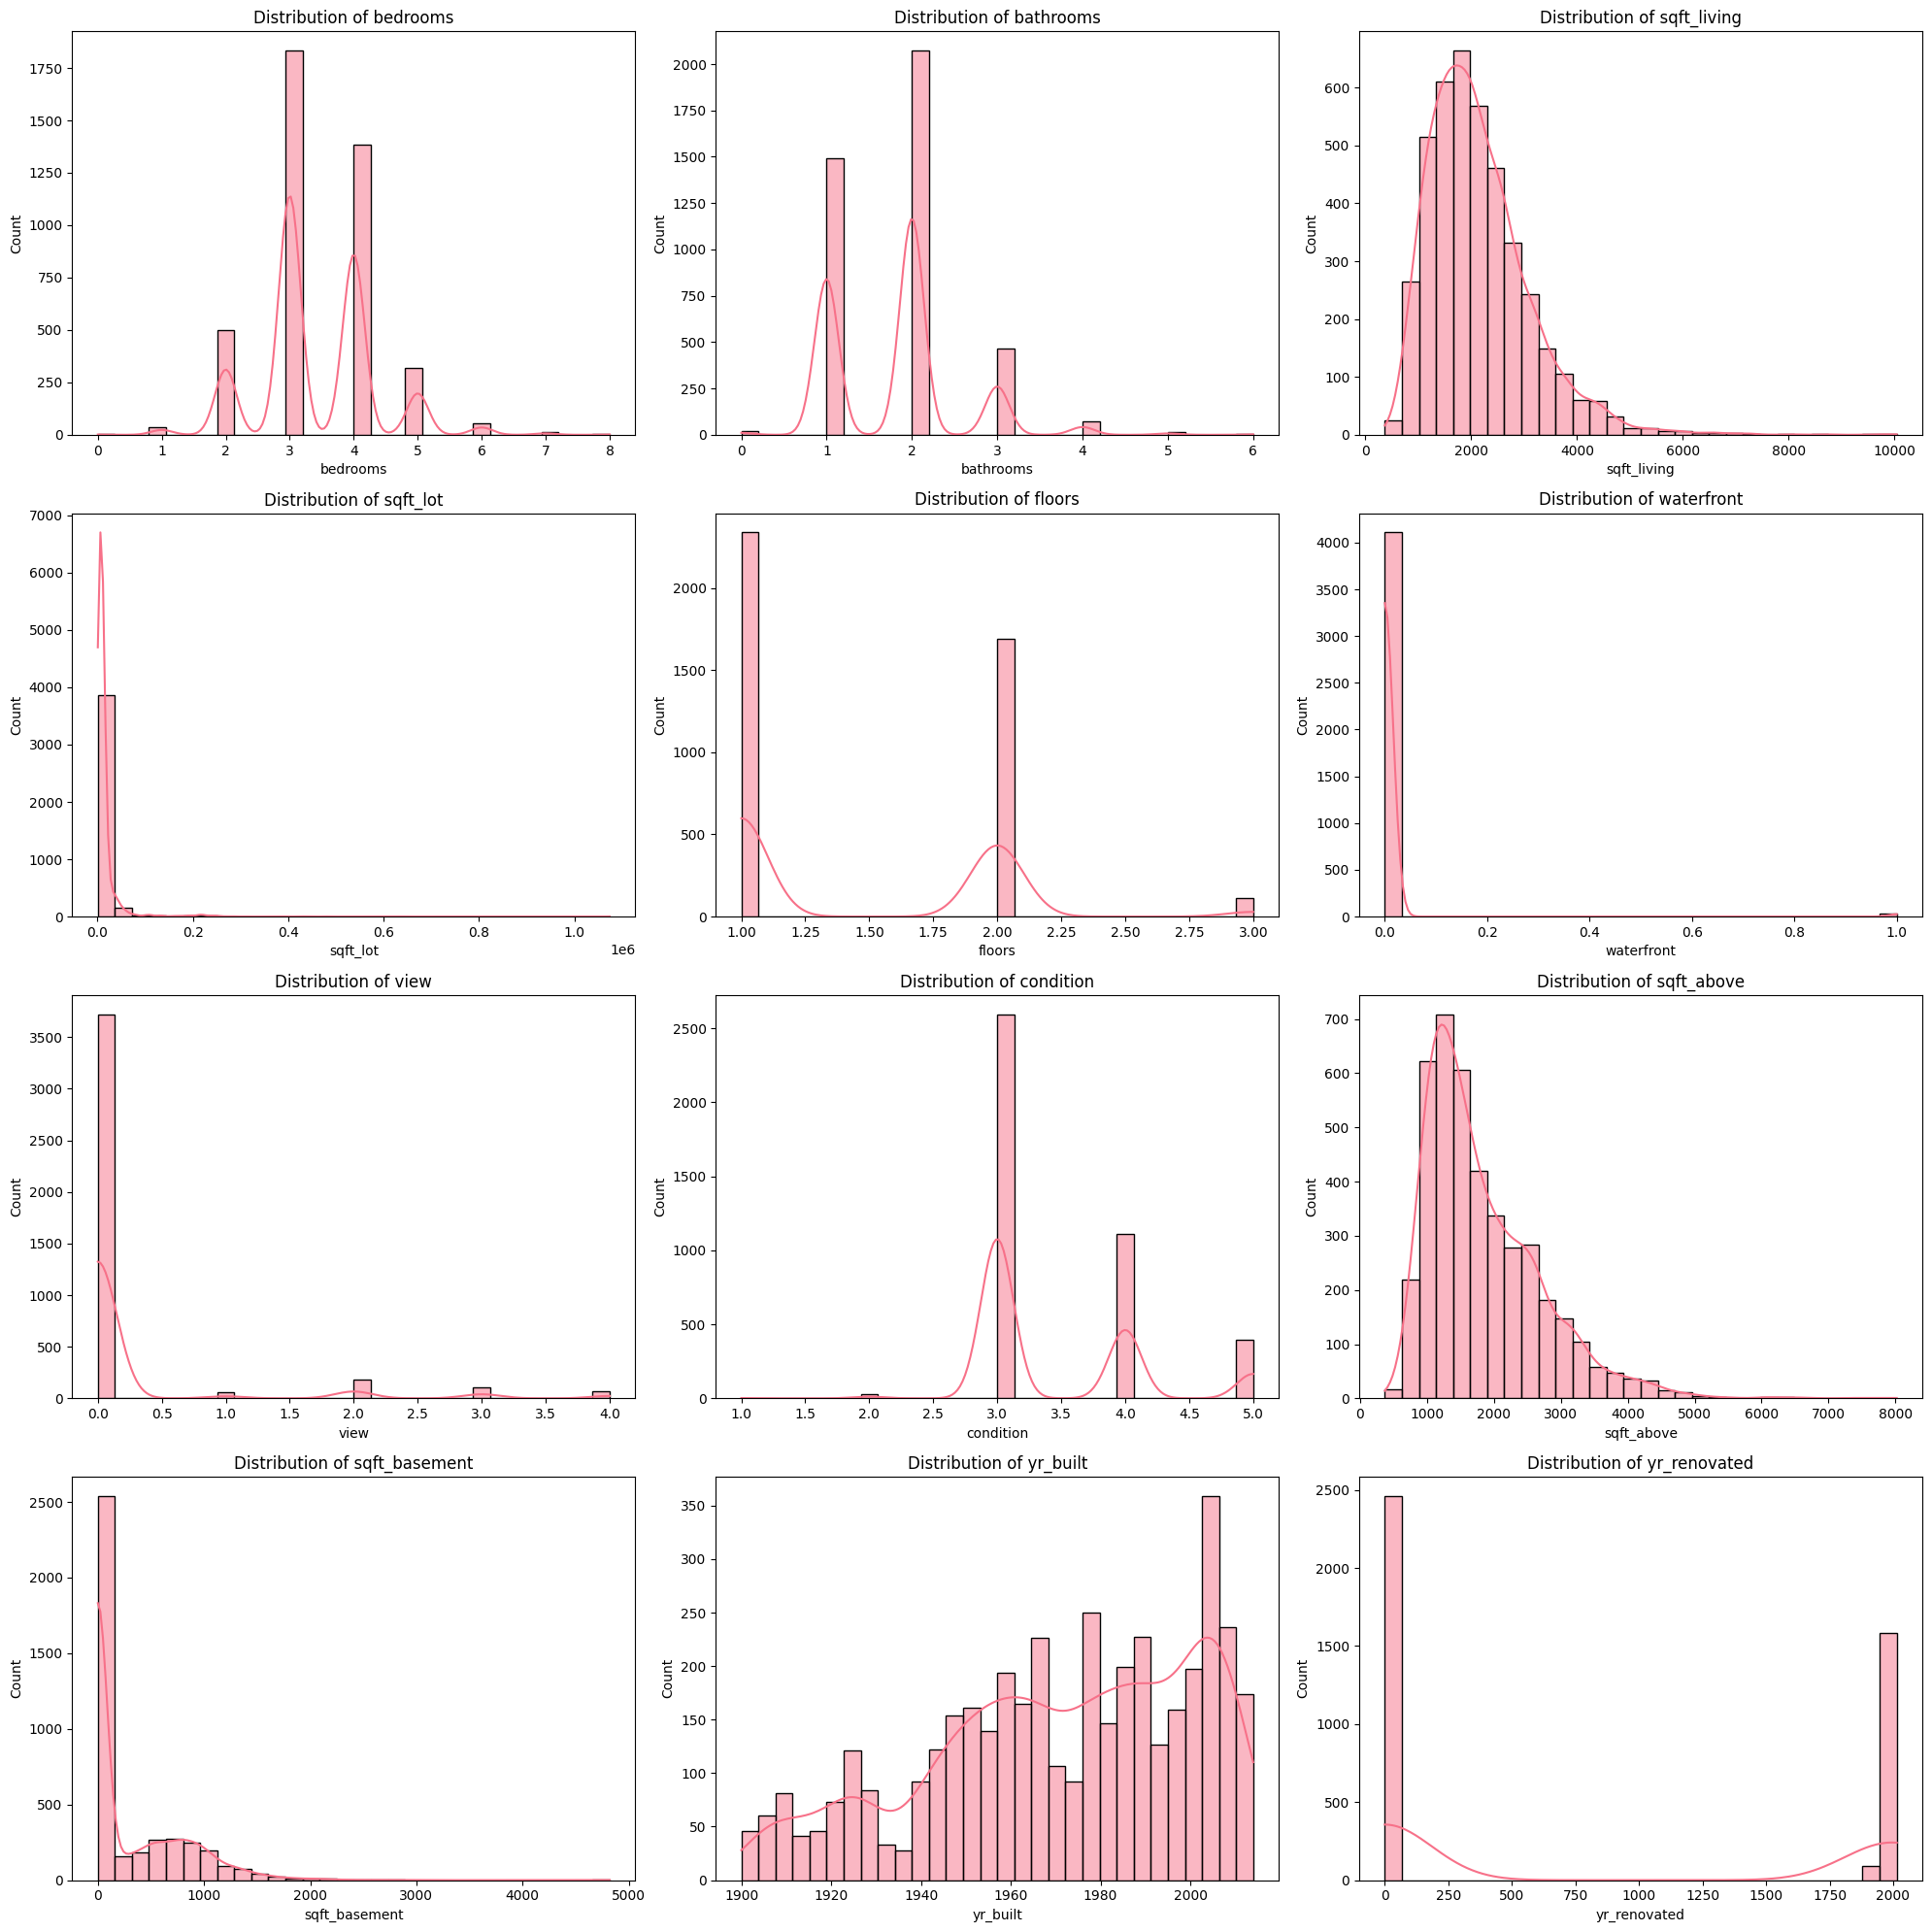

In [28]:
# Get numerical columns excluding price
numerical_cols = [col for col in df.select_dtypes(include=['int64']).columns if col != 'price']
n_features = len(numerical_cols)

# Calculate number of rows and columns needed for subplots
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # This ensures we have enough rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
axes = axes.ravel()

# Create distribution plots
for idx, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[idx], bins=30, kde=True)
    axes[idx].set_title(f'Distribution of {col}')

# Remove empty subplots if any
for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

### Custom Linear Regression Implementation
A custom LinearRegression class is implemented, which uses the Normal Equation to fit the linear regression model. The class includes methods for model fitting and prediction.

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [30]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None
        self.intercept = None
    
    def fit(self, X, y):
        """
        Fit the linear regression model using Normal Equation
        """
        try:
            # Add column of ones for intercept
            X_b = np.c_[np.ones((X.shape[0], 1)), X]
            
            # Calculate theta using normal equation with regularization
            theta = np.linalg.inv(X_b.T.dot(X_b) + 1e-8 * np.eye(X_b.shape[1])).dot(X_b.T).dot(y)
            
            self.intercept = float(theta[0])
            self.coefficients = theta[1:].astype(float)
            
            print("Model fitted successfully!")
            print(f"Intercept: {self.intercept}")
            print(f"Number of coefficients: {len(self.coefficients)}")
            
            return self
            
        except Exception as e:
            print(f"Error in fitting model: {str(e)}")
            raise
    
    def predict(self, X):
        """Make predictions on new data"""
        if self.coefficients is None or self.intercept is None:
            raise ValueError("Model has not been fitted yet!")
        return np.dot(X, self.coefficients) + self.intercept

### Model Training and Evaluation
The dataset is split into training and test sets, and the features are scaled using StandardScaler. The custom LinearRegression model is then trained on the scaled training data, and its performance is evaluated on both the training and test sets using various metrics:

- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **Mean Absolute Error (MAE)**
- **R-squared (R^2) Score**

Cross-validation is also performed to assess the model's generalization performance.

In [31]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate Mean Squared Error
    MSE = (1/n) * Σ(y_true - y_pred)²
    """
    return np.mean((y_true - y_pred) ** 2)

In [32]:
def root_mean_squared_error(y_true, y_pred):
    """
    Calculate Root Mean Squared Error
    RMSE = √MSE
    """
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [33]:
def mean_absolute_error(y_true,y_pred):
    """
    Calculate Mean Absolute Error
    MAE = (1/n) * sum|y_true - y_pred|
    """
    return np.mean(np.abs(y_true - y_pred))

In [34]:
def r2_score(y_true, y_pred):
    """
    calculates R^2 Score
    R^2 = 1 - (sum(y_true - y_pred)^2 / sum(y_true - y_mean)^2)
    """
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [35]:
def cross_validation(X,y,k_folds=5):
    """
    Perform k-fold cross-validation
    returns R^2 scores for each fold
    """
    
    #Create array to store scores
    scores = np.zeros(k_folds)
    
    #Calculate fold size
    fold_size = len(X) // k_folds
    
    #shuffle indices
    indices = np.random.permutation(len(X))
    
    for i in range(k_folds):
        #Calculate start and end indices for test fold
        start_idx = i * fold_size
        end_idx = start_idx + fold_size if i < k_folds - 1 else len(X)
        
        #Get test indices for this fold
        test_idx = indices[start_idx:end_idx]
        
        #Get train indices
        train_idx = np.concatenate([indices[:start_idx], indices[end_idx:]])
        
        #split data into training and test data
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        #Train model
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        #make predictions
        y_pred = model.predict(X_test)
        
        #Calculate and store R^2 score
        scores[i] = r2_score(y_test, y_pred)
        
    return scores

In [36]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [37]:
print("Shape of X: ",X.shape)
print("Shape of y: ",y.shape)

Shape of X:  (4140, 12)
Shape of y:  (4140,)


In [38]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [39]:
#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

Model fitted successfully!
Intercept: 556737.9187785122
Number of coefficients: 12


In [41]:
if model.coefficients is None:
    raise ValueError("Model coefficients are None after fitting!")

In [42]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

In [43]:
def evaluate_model(y_true, y_pred,dataset_name=''):
    mse = mean_squared_error(y_true,y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nMetrics for {dataset_name}: ")
    print(f"Mean Squared Error: ${mse:,.2f}:")
    print(f"Root Mean Squared Error: ${rmse:,.2f}")
    print(f"Mean Absolute Error: ${mae:,.2f}")
    print(f"r2 Score: {r2:.4f}")

In [44]:
evaluate_model(y_train, y_pred_train, "Training Data")


Metrics for Training Data: 
Mean Squared Error: $322,539,058,392.86:
Root Mean Squared Error: $567,925.22
Mean Absolute Error: $175,206.35
r2 Score: 0.1926


In [45]:
evaluate_model(y_test, y_pred_test, "Test Data")


Metrics for Test Data: 
Mean Squared Error: $66,174,589,498.82:
Root Mean Squared Error: $257,244.22
Mean Absolute Error: $168,784.37
r2 Score: 0.3688


In [46]:
cv_scores = cross_validation(X_train_scaled, y_train)
print("\nCross-Validation r2 Scores:", cv_scores)
print("Average CV r2 score:", cv_scores.mean())
print("CV r2 Standard deviation:", cv_scores.std())

Model fitted successfully!
Intercept: 558235.9317299352
Number of coefficients: 12
Model fitted successfully!
Intercept: 560407.6792227463
Number of coefficients: 12
Model fitted successfully!
Intercept: 555514.171951112
Number of coefficients: 12
Model fitted successfully!
Intercept: 548844.3902322105
Number of coefficients: 12
Model fitted successfully!
Intercept: 560640.434341874
Number of coefficients: 12

Cross-Validation r2 Scores: [0.53878476 0.50239665 0.19740836 0.03303469 0.5348181 ]
Average CV r2 score: 0.36128851241792576
CV r2 Standard deviation: 0.20791162562327256


## Feature Importance Analysis
The importance of each feature in the model is analyzed by examining the absolute values of the coefficients. The results are displayed in a bar plot.

In [47]:
feature_names = df.drop('price', axis=1).columns
coefficients_array = model.coefficients

print("\nFeature Importance Calculation:")
print(f"Number of Features: {len(feature_names)}")
print(f"number of Coefficients: {len(coefficients_array)}")


Feature Importance Calculation:
Number of Features: 12
number of Coefficients: 12


In [48]:
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients_array
})

In [49]:
print(feature_importance)

          Feature    Coefficient
0        bedrooms  -58898.410550
1       bathrooms   45366.327860
2     sqft_living  136599.406304
3        sqft_lot  -26703.815121
4          floors   13539.507311
5      waterfront   36958.406939
6            view   27752.031966
7       condition   20912.401594
8      sqft_above  121592.254845
9   sqft_basement   56781.492797
10       yr_built  -61614.035618
11   yr_renovated    4601.453164


In [50]:
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

In [51]:
print('\nfeature Importance: ')
print(feature_importance)


feature Importance: 
          Feature    Coefficient  Abs_Coefficient
2     sqft_living  136599.406304    136599.406304
8      sqft_above  121592.254845    121592.254845
10       yr_built  -61614.035618     61614.035618
0        bedrooms  -58898.410550     58898.410550
9   sqft_basement   56781.492797     56781.492797
1       bathrooms   45366.327860     45366.327860
5      waterfront   36958.406939     36958.406939
6            view   27752.031966     27752.031966
3        sqft_lot  -26703.815121     26703.815121
7       condition   20912.401594     20912.401594
4          floors   13539.507311     13539.507311
11   yr_renovated    4601.453164      4601.453164


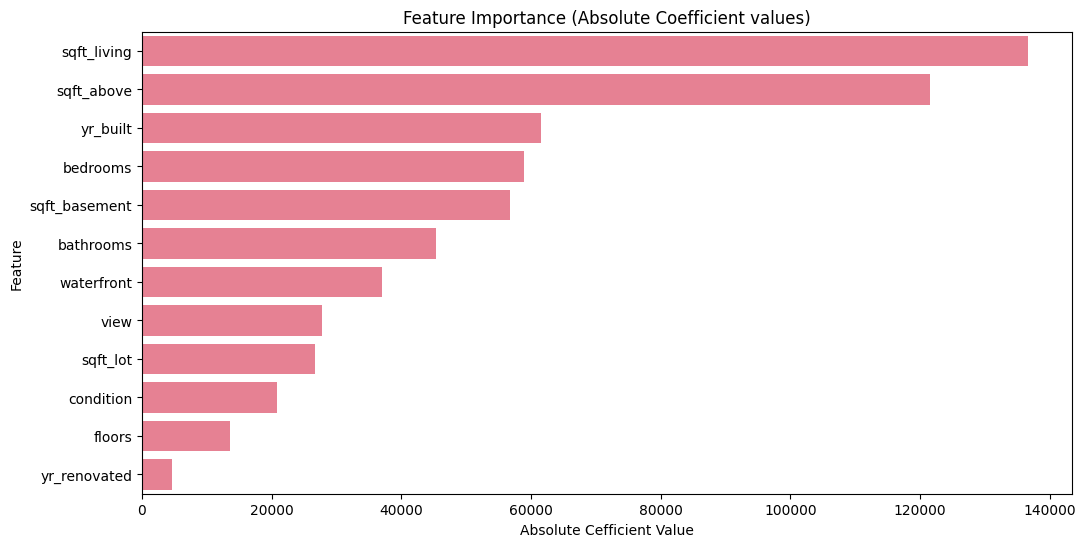

In [52]:
plt.figure(figsize=(12,6))
sns.barplot(data=feature_importance, x="Abs_Coefficient", y="Feature")
plt.title("Feature Importance (Absolute Coefficient values)")
plt.xlabel("Absolute Cefficient Value")
plt.show()

### Residual Analysis
Residual plots and distributions are examined to check the model's assumptions and identify any potential issues.

In [53]:
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

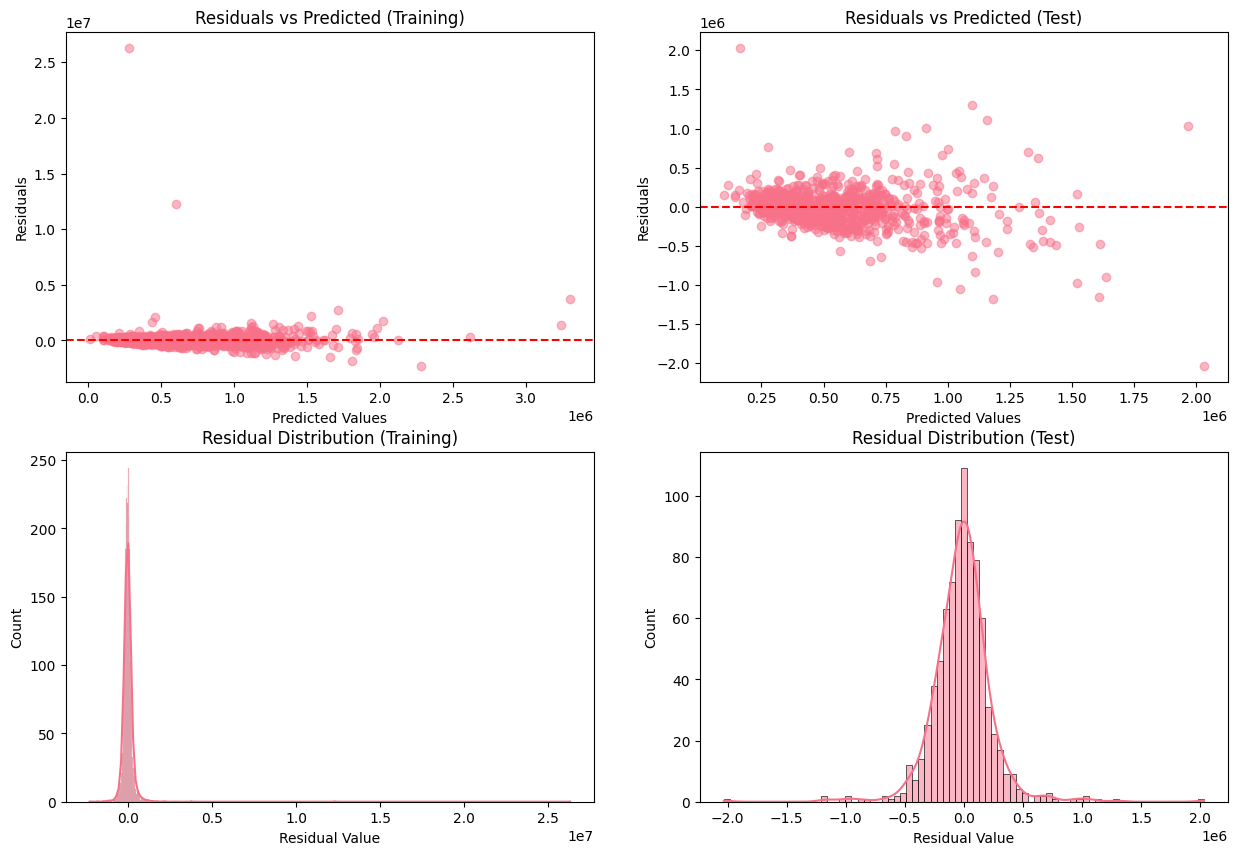

In [54]:
fig, axes = plt.subplots(2,2,figsize=(15,10))

axes[0,0].scatter(y_pred_train, residuals_train, alpha=0.5)
axes[0,0].axhline(y=0,color='r',linestyle='--')
axes[0,0].set_title('Residuals vs Predicted (Training)')
axes[0,0].set_xlabel('Predicted Values')
axes[0,0].set_ylabel('Residuals')

axes[0, 1].scatter(y_pred_test, residuals_test, alpha=0.5)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_title('Residuals vs Predicted (Test)')
axes[0, 1].set_xlabel('Predicted Values')
axes[0, 1].set_ylabel('Residuals')

sns.histplot(residuals_train, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Residual Distribution (Training)')
axes[1, 0].set_xlabel('Residual Value')

sns.histplot(residuals_test, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Residual Distribution (Test)')
axes[1, 1].set_xlabel('Residual Value')

plt.show()

### Actual vs. Predicted Prices
A scatter plot is created to visualize the relationship between the actual and predicted house prices.

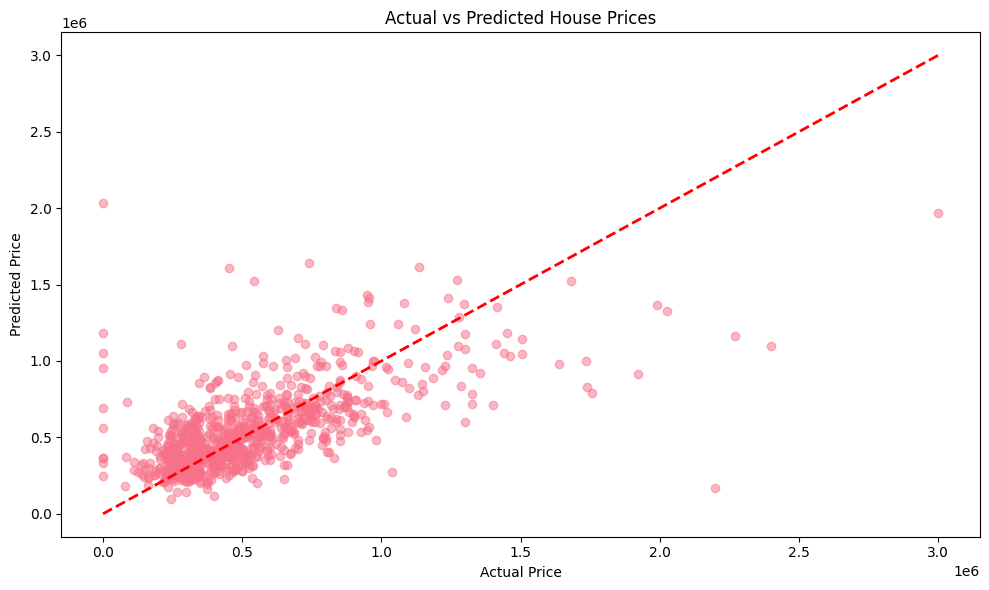

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

### Price Prediction for Example House
A function is provided to predict the price of a new house given its features.

In [56]:
def predict_price(features_dict):
    input_array = np.array([[features_dict[col]for col in feature_names]])
    input_scaled = scaler.transform(input_array)
    return model.predict(input_scaled)[0]


In [57]:
example_house = {'bedrooms':3,
                 'bathrooms':2,
                 'sqft_living':2000,
                 'sqft_lot':5000,
                 'floors':2,
                 'waterfront':0,
                 'view':0,
                 'condition':3,
                 'sqft_above':1500,
                 'sqft_basement':500,
                 'yr_built':1990,
                 'yr_renovated':0}

In [58]:
predicted_price = predict_price(example_house)
print(f"\nPredicted price for example house: ${predicted_price:,.2f}")


Predicted price for example house: $501,424.99
